# 淘宝用户行为分析

# 项目描述

产品设计之前先要进行用户研究，以大量数据为支撑的用户行为研究极为重要。本项目通过采用淘宝的百万级用户数据，深度分析用户的行为。

## 分析的目的与分析思路

```
本项目分析的目的是提高淘宝店铺的投资回报率，使得进店的每个用户价值最大化。
分析思路是：分析用户的购物情况，复购率分析，用户留存率分析，获客分析。从时间的维度分析每天，每周用户的活跃度，计算每个环节的转化率，指导运营人员及时调整运营策略。
分析步骤是：
1.数据收集，读取数据并进行抽样（多的话）；
2.数据清洗；
3.数据的描述性统计分析；
4.数据的探索性分析：统计浏览量，独立访客数，分析有购买行为的用户，复购率分析；
5.从时间的维度分析：
    （1）每周用户行为数量的变化趋势；
    （2）每天的浏览量的趋势分析
    （3）一天中不同时间段的用户行为变化趋势
6.浏览量top10的产品
7.各个行为之间的转化率
```

## 数据收集

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('user.csv')
data.head(10)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,30282407,189836232,1,NaN,6431,2014-12-15 14
1,91557809,43134506,1,NaN,1863,2014-12-10 18
2,21233965,3776579,3,94rlqle,13664,2014-12-02 20
3,54590569,107237828,1,NaN,1863,2014-12-02 03
4,137120980,54431185,1,94jrwhn,5395,2014-12-09 17
5,39445216,32622096,1,9tac374,10045,2014-11-25 12
6,79151138,159478145,1,NaN,11552,2014-12-06 20
7,37554907,336589806,1,NaN,1956,2014-11-19 06
8,114851398,401796360,1,NaN,150,2014-11-30 19
9,102033461,345800343,1,NaN,1385,2014-11-30 17


In [4]:
data.shape

(1000000, 6)

In [5]:
# 随机抽取部分样本

#data = data.sample(n=10,#抽取的行/列数
#                  axis=0,#0为行，1为列
#                  replace=False # 是否有放回
#                  )
#data.to_csv('sample_user.csv')

## 数据处理

In [6]:
# 数据的缺失值处理
# user_geohash地理位置列删除
data.drop('user_geohash',axis=1,inplace=True)
data.head()

,user_id,item_id,behavior_type,item_category,time
0,30282407,189836232,1,6431,2014-12-15 14
1,91557809,43134506,1,1863,2014-12-10 18
2,21233965,3776579,3,13664,2014-12-02 20
3,54590569,107237828,1,1863,2014-12-02 03
4,137120980,54431185,1,5395,2014-12-09 17


In [7]:
# 数据的一致性处理
data['date'] = data['time'].apply(lambda s:s.split(' ')[0]) #获取日期
data['hour'] = data['time'].apply(lambda s:s.split(' ')[1]) #获取小时
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,1,6431,2014-12-15 14,2014-12-15,14
1,91557809,43134506,1,1863,2014-12-10 18,2014-12-10,18
2,21233965,3776579,3,13664,2014-12-02 20,2014-12-02,20
3,54590569,107237828,1,1863,2014-12-02 03,2014-12-02,03
4,137120980,54431185,1,5395,2014-12-09 17,2014-12-09,17


In [8]:
# 用户不同行为的频数
data['behavior_type'].value_counts()

# 将用户行为的类型由数值转为字符串
dd = {1:'pick',2:'collect',3:'cart',4:'buy'}
data['behavior_type'] = data['behavior_type'].apply(lambda s:dd[s])
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,pick,6431,2014-12-15 14,2014-12-15,14
1,91557809,43134506,pick,1863,2014-12-10 18,2014-12-10,18
2,21233965,3776579,cart,13664,2014-12-02 20,2014-12-02,20
3,54590569,107237828,pick,1863,2014-12-02 03,2014-12-02,03
4,137120980,54431185,pick,5395,2014-12-09 17,2014-12-09,17


In [9]:
data.dtypes

user_id           int64
item_id           int64
behavior_type    object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [10]:
# time列和date列为日期类型，hour列为整数类型
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['hour'].astype('int64')

In [11]:
data.dtypes

user_id                   int64
item_id                   int64
behavior_type            object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [12]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17


## 描述性分析

```
user_id:用户名（脱敏）
item_id:商品名（脱敏）
behavior_type:行为（点击，收藏，加入购物车，购买）对应1,2,3,4
user_geohash:地理位置（大量缺失）
item_category:商品类别
time:行为发生时间
```

In [13]:
# 完整性分析
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
user_id          1000000 non-null int64
item_id          1000000 non-null int64
behavior_type    1000000 non-null object
item_category    1000000 non-null int64
time             1000000 non-null datetime64[ns]
date             1000000 non-null datetime64[ns]
hour             1000000 non-null int64
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 53.4+ MB


In [14]:
# 用户行为分析：基本用户的购物情况
# 用户不同行为的频数
data.behavior_type.value_counts()

pick       942150
cart        28242
collect     19837
buy          9771
Name: behavior_type, dtype: int64

In [15]:
# 不同用户的浏览量
data['user_id'].value_counts()

36233277     2611
65645933     1717
59511789     1652
73196588     1652
130270245    1580
83813302     1454
7234861      1443
52577851     1116
52772551     1054
74314315     1026
123842164    1020
5315279      1013
137175187    1012
139435539    1003
45649071      989
116049086     981
38839327      956
53080199      954
37671999      911
59567091      898
131573117     890
122338823     887
77374787      877
21978171      864
77339861      853
11361547      846
82905542      843
70240139      829
34424883      807
56462249      786
             ... 
7409910         1
117517120       1
123969946       1
60534988        1
96156613        1
61534398        1
61375478        1
40694580        1
72527976        1
118476662       1
57954612        1
127935117       1
59172718        1
16269352        1
82252219        1
17254770        1
81542356        1
26050959        1
24869620        1
9365986         1
55333272        1
81406411        1
126412579       1
98621566        1
76679100  

独立访客数为9924人

In [16]:
# 有购买行为的独立访客数
user_buy = data[data['behavior_type']=='buy']
#user_buy.user_id.value_counts()
user_buy.user_id.nunique()# 统计所有不重复值的数量

4522

In [17]:
user_buy.user_id.unique()# 统计所有不重复的值

array([ 45743550, 101532356, 123952685, ...,   8362294,  72633796,
        54204970], dtype=int64)

In [18]:
# 从时间的维度分析用户行为
data['week'] = data['date'].dt.weekday

In [19]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17,1


In [20]:
# 每周用户行为变化趋势
week_user = data.week.value_counts()
week_user = week_user.sort_index()
week_user.index = np.arange(1,8)
week_user

1    126743
2    157728
3    158390
4    162079
5    140821
6    124427
7    129812
Name: week, dtype: int64

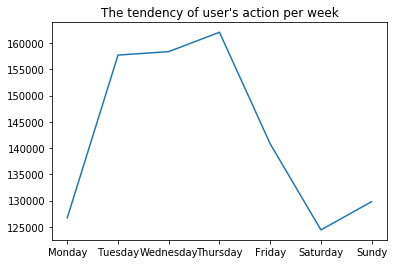

In [21]:
#plt.figure(figsize=(15,4))
week_user.plot()
plt.xticks(week_user.index,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sundy'])
plt.title('The tendency of user\'s action per week')
plt.show()

```由上图可知：周一到周二用户的行为趋势逐渐增加，周二到周四逐渐趋于稳定，周四为一周中的最高峰，周四到周六用户行为逐渐减少，并且周六为一周中的最低值，周六过后用户行为逐渐增加```

## 探索性分析

In [22]:
## 每天的用户浏览量变化趋势
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17,1


In [23]:
data1 = data[data['behavior_type']=='pick']
day_pick = data1.groupby(['date']).agg({'user_id':'count'})
day_pick

,user_id
date,
2014-11-18,28260
2014-11-19,27541
2014-11-20,26881
2014-11-21,25736
2014-11-22,27960
2014-11-23,29554
2014-11-24,29057
2014-11-25,28417
2014-11-26,27793


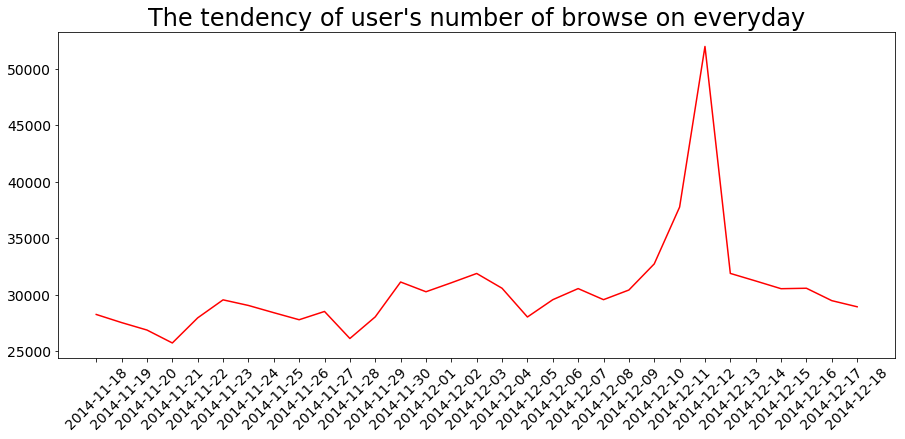

In [24]:
import matplotlib.dates as mdate
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d')) #设置日期显示格式
plt.title('The tendency of user\'s number of browse on everyday',fontsize=24)
ax.plot(day_pick.index,day_pick.values,color='red')
plt.xticks(day_pick.index,rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.show()


```由上图可知，用户行为有逐渐增多的趋势，尤其是12月8日开始到12月13日，用户行为明显高于其他时期，因为马上双12 购物节```

## 分析一天中不同时间段的用户行为

In [25]:

data.head(10)

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17,1
5,39445216,32622096,pick,10045,2014-11-25 12:00:00,2014-11-25,12,1
6,79151138,159478145,pick,11552,2014-12-06 20:00:00,2014-12-06,20,5
7,37554907,336589806,pick,1956,2014-11-19 06:00:00,2014-11-19,6,2
8,114851398,401796360,pick,150,2014-11-30 19:00:00,2014-11-30,19,6
9,102033461,345800343,pick,1385,2014-11-30 17:00:00,2014-11-30,17,6


In [26]:
data_hour = data[['user_id','hour']]
data_hour = data_hour.groupby('hour').agg({'user_id':'count'})
data_hour

,user_id
hour,
0,42660
1,21916
2,11981
3,8086
4,6553
5,7242
6,12918
7,23508
8,32250


<function matplotlib.pyplot.show>

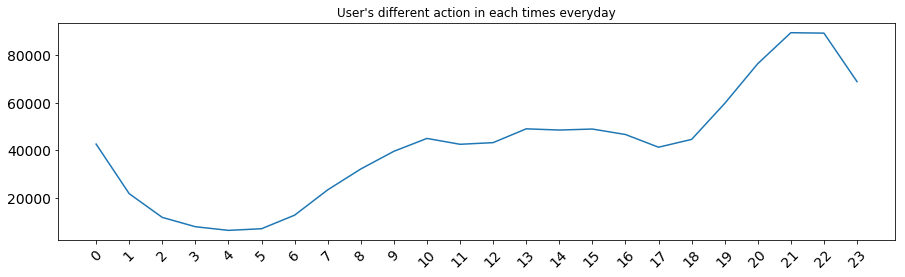

In [31]:
plt.figure(figsize=(15,4))
plt.plot(data_hour.index,data_hour.values)
plt.xticks(np.arange(24),rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.title('User\'s different action in each times everyday' )
plt.show

```从上图可知：大部分用户活跃时间在9：00-22：00，21：00-22：00达到一天中的最大值，主要的活跃时间为周二-周四，运营人员要举办打折活动，可以参照周二-周四的21：00-22：00这个时间段进行```

## 从商品的角度分析：查看top10的商品

In [34]:
data.head(10)

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17,1
5,39445216,32622096,pick,10045,2014-11-25 12:00:00,2014-11-25,12,1
6,79151138,159478145,pick,11552,2014-12-06 20:00:00,2014-12-06,20,5
7,37554907,336589806,pick,1956,2014-11-19 06:00:00,2014-11-19,6,2
8,114851398,401796360,pick,150,2014-11-30 19:00:00,2014-11-30,19,6
9,102033461,345800343,pick,1385,2014-11-30 17:00:00,2014-11-30,17,6


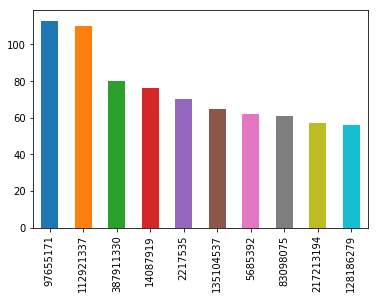

In [35]:
item_top = data[data['behavior_type']=='pick']['item_id'].value_counts().head(10)
item_top.plot.bar()

## 各个环节的转化率

In [36]:
data.head(10)

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pick,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pick,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pick,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pick,5395,2014-12-09 17:00:00,2014-12-09,17,1
5,39445216,32622096,pick,10045,2014-11-25 12:00:00,2014-11-25,12,1
6,79151138,159478145,pick,11552,2014-12-06 20:00:00,2014-12-06,20,5
7,37554907,336589806,pick,1956,2014-11-19 06:00:00,2014-11-19,6,2
8,114851398,401796360,pick,150,2014-11-30 19:00:00,2014-11-30,19,6
9,102033461,345800343,pick,1385,2014-11-30 17:00:00,2014-11-30,17,6


In [40]:
pick_num = data[data['behavior_type']=='pick']['user_id'].count()
collect_num = data[data['behavior_type']=='collect']['user_id'].count()
cart_num = data[data['behavior_type']=='cart']['user_id'].count()
buy_num = data[data['behavior_type']=='buy']['user_id'].count()
middle_num = collect_num + cart_num

p_m = middle_num/pick_num
p_m

0.05103115215199278

In [41]:
p_b = buy_num/pick_num
p_b

0.010370960038210477

购买转化率：1%